# logistic Regression

In [3]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline

In [4]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
breast_cancer_wisconsin_original = fetch_ucirepo(id=15) 
  
# data (as pandas dataframes) 
X = breast_cancer_wisconsin_original.data.features 
y = breast_cancer_wisconsin_original.data.targets 


In [5]:
X.columns

Index(['Clump_thickness', 'Uniformity_of_cell_size',
       'Uniformity_of_cell_shape', 'Marginal_adhesion',
       'Single_epithelial_cell_size', 'Bare_nuclei', 'Bland_chromatin',
       'Normal_nucleoli', 'Mitoses'],
      dtype='object')

In [6]:
y['Class'].unique()

array([2, 4], dtype=int64)

In [7]:
y['Class'] = np.where(y['Class'] == 2,0,1)
y['Class'].value_counts()

C:\Users\DAI.STUDENTSDC\AppData\Local\Temp\ipykernel_15128\1832503168.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['Class'] = np.where(y['Class'] == 2,0,1)


Class
0    458
1    241
Name: count, dtype: int64

In [8]:
X.drop('Bare_nuclei',axis=1, inplace = True)

C:\Users\DAI.STUDENTSDC\AppData\Local\Temp\ipykernel_15128\3635310421.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop('Bare_nuclei',axis=1, inplace = True)


In [9]:
X.isna().sum()

Clump_thickness                0
Uniformity_of_cell_size        0
Uniformity_of_cell_shape       0
Marginal_adhesion              0
Single_epithelial_cell_size    0
Bland_chromatin                0
Normal_nucleoli                0
Mitoses                        0
dtype: int64

In [10]:
lr = LogisticRegression()
lr.fit(X,y)
lr.coef_

C:\Users\DAI.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[0.56914683, 0.00794454, 0.54752079, 0.30860388, 0.13050298,
        0.5656214 , 0.12514389, 0.54475134]])

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=24, test_size= 0.3)

In [12]:
lr= LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
#pd.crosstab(y_test['Class'].values,y_pred)

C:\Users\DAI.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [13]:
print(confusion_matrix(y_test['Class'],y_pred))

[[135   3]
 [  4  68]]


In [14]:
accuracy_score(y_test['Class'],y_pred)

0.9666666666666667

In [15]:
print(y['Class'].value_counts(),'\n')
print(y['Class'].value_counts(normalize=True),'\n')
# print(y_test['Class'].value_counts(),'\n')
print(y_test['Class'].value_counts(),'\n')

Class
0    458
1    241
Name: count, dtype: int64 

Class
0    0.655222
1    0.344778
Name: proportion, dtype: float64 

Class
0    138
1     72
Name: count, dtype: int64 



#### Naive Rule /Baseline Model
-  Any ML Model score should better than score of the Naive/ baseline model.
-  Here, baseline(naive) model score = 0.6571428571428571 & ML Model score = 0.9666666666666667.
-  Hence we can say that this ML Model can be a relevant model. However if it is sufficient/enough or not, it would depend on the business or necessity.

In [17]:
y_pred = np.zeros(210)
y_test['Class'].value_counts()

Class
0    138
1     72
Name: count, dtype: int64

In [18]:
accuracy_score(y_test['Class'],y_pred)

0.6571428571428571

## another dataset

In [20]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17) 
  
# data (as pandas dataframes) 
X = breast_cancer_wisconsin_diagnostic.data.features 
y = breast_cancer_wisconsin_diagnostic.data.targets 
  
# metadata 
# print(breast_cancer_wisconsin_diagnostic.metadata) 
  
# # variable information 
# print(breast_cancer_wisconsin_diagnostic.variables) 

In [21]:
# y = np.where(y['Diagnosis']=='M',1 ,0)
lbl = LabelEncoder()
y.Diagnosis = lbl.fit_transform(y.Diagnosis)

C:\Users\DAI.STUDENTSDC\AppData\Local\Temp\ipykernel_15128\2195239393.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y.Diagnosis = lbl.fit_transform(y.Diagnosis)


In [22]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=24, test_size= 0.3)

In [23]:
X.shape

(569, 30)

In [24]:
lr= LogisticRegression(solver='saga', max_iter = 600)
lr.fit(X_train, y_train.Diagnosis)


C:\Users\DAI.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(max_iter=600, solver='saga')

In [25]:
y_pred = lr.predict(X_test)

In [26]:
print(confusion_matrix(y_test['Diagnosis'],y_pred))

[[104   2]
 [  9  56]]


In [27]:
accuracy_score(y_test['Diagnosis'],y_pred)

0.935672514619883

In [28]:
101/171 

0.5906432748538012

## iris DataSEt

In [30]:
# from ucimlrepo import fetch_ucirepo 
  
# # fetch dataset 
# iris = fetch_ucirepo(id=53) 
# X = iris.data.features 
# y = iris.data.targets 

df = pd.read_csv('Datasets/iris.csv')
y = df["Species"]
X = df.drop("Species", axis = 1)

In [31]:
X.head()


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [32]:
y1 = lbl.fit_transform(y)

In [33]:
# y['class'] = y1

In [34]:
X_train, X_test,  y_train, y_test = train_test_split(X,y1,random_state = 24, test_size = .3 )

In [35]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [36]:
y_pred = lr.predict(X_test)

In [37]:
accuracy_score(y_test, y_pred)

0.9777777777777777

In [38]:
confusion_matrix(y_test, y_pred)

array([[15,  0,  0],
       [ 0, 11,  1],
       [ 0,  0, 18]], dtype=int64)

In [39]:
18+11+15+1

45

In [40]:
18/45

0.4

##### new dataset

In [42]:
df = pd.read_csv('Datasets/Default.csv')
df['default'].value_counts()

default
No     9667
Yes     333
Name: count, dtype: int64

In [43]:
y = df["default"]
X = df.drop("default", axis = 1)

In [44]:
y = lbl.fit_transform(y)

In [45]:
y

array([0, 0, 0, ..., 0, 0, 0])

In [46]:
X["student"] = lbl.fit_transform(X["student"])

In [47]:
X_train, X_test,  y_train, y_test = train_test_split(X,y,random_state = 24, test_size = .3 )
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
accuracy_score(y_test, y_pred)

0.97

In [48]:
x = confusion_matrix(y_test, y_pred)
x

array([[2885,   16],
       [  74,   25]], dtype=int64)

In [49]:
# 2885/(2885 + 16 + 74 + 25)
x.max()/x.sum()
# y_pred_nv = np.zeros(y_test.shape[0])

0.9616666666666667

### KFold CV

In [51]:
pipe = Pipeline([('LR', lr)])

In [52]:
results = cross_val_score(pipe, X, y)
results.mean()

0.9731

### wine dataset

In [54]:
df = pd.read_csv("Datasets/wine.csv")

In [55]:
df.head()

,Class,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoid,Proanthocyanins,Intensity,Hue,OD280,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [56]:
y = df["Class"]
X = df.drop("Class", axis = 1)

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state= 24, test_size = .3)

In [58]:
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
accuracy_score(y_test, y_pred)

C:\Users\DAI.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9074074074074074

In [59]:
results = cross_val_score(pipe, X, y)
results.mean()

C:\Users\DAI.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\DAI.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/l

0.9555555555555555

### car evalution dataset

In [61]:
import sklearn

In [62]:
sklearn.__version__

'1.5.2'

In [63]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
car_evaluation = fetch_ucirepo(id=19) 
  
# data (as pandas dataframes) 
X = car_evaluation.data.features 
y = car_evaluation.data.targets 

X.head()

,buying,maint,doors,persons,lug_boot,safety
0,vhigh,vhigh,2,2,small,low
1,vhigh,vhigh,2,2,small,med
2,vhigh,vhigh,2,2,small,high
3,vhigh,vhigh,2,2,med,low
4,vhigh,vhigh,2,2,med,med


In [64]:
y['class'].value_counts()

class
unacc    1210
acc       384
good       69
vgood      65
Name: count, dtype: int64

In [65]:
y['class'] = np.where(y['class'] == 'unacc', 0, 1).astype('int')

C:\Users\DAI.STUDENTSDC\AppData\Local\Temp\ipykernel_15128\2930585468.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['class'] = np.where(y['class'] == 'unacc', 0, 1).astype('int')


In [66]:
y['class'].value_counts(normalize = True)* 100

class
0    70.023148
1    29.976852
Name: proportion, dtype: float64

In [67]:
from sklearn.preprocessing import OneHotEncoder

In [68]:
ohe = OneHotEncoder(drop = 'first', handle_unknown = 'ignore', sparse_output = False).set_output(transform = 'pandas')

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 24,  test_size = .3)

In [70]:
y_train['class'].value_counts(normalize = True)* 100

class
0    70.554177
1    29.445823
Name: proportion, dtype: float64

In [71]:
y_test['class'].value_counts(normalize = True)* 100

class
0    68.786127
1    31.213873
Name: proportion, dtype: float64

In [72]:
X_trn_ohe = ohe.fit_transform(X_train)
X_tst_ohe = ohe.transform(X_test)

In [73]:
y_train.astype('int')

,class
1667,1
1654,0
508,0
202,0
1493,0
...,...
1425,0
343,0
192,0
899,0


In [74]:
y_train['class'].value_counts()

class
0    853
1    356
Name: count, dtype: int64

In [75]:
lr = LogisticRegression()

In [76]:
lr.fit(X_trn_ohe, y_train['class'])
y_pred = lr.predict(X_tst_ohe)
print(accuracy_score(y_test['class'],y_pred))

0.9479768786127167


### using stratification

In [78]:
# stratification
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 24,  test_size = .3, stratify= y['class'])

In [79]:
print(y_train['class'].value_counts()) # stratified each train and test in 70:30 ratio (for test_size=.3)
print(y_test['class'].value_counts())

class
0    847
1    362
Name: count, dtype: int64
class
0    363
1    156
Name: count, dtype: int64


In [80]:
X_trn_ohe = ohe.fit_transform(X_train)
X_tst_ohe = ohe.transform(X_test)
lr.fit(X_trn_ohe, y_train['class'])
y_pred = lr.predict(X_tst_ohe)
print(accuracy_score(y_test['class'],y_pred))

0.9633911368015414


In [81]:
lr = LogisticRegression(solver = 'newton-cg')
lr.fit(X_trn_ohe, y_train['class'])
y_pred = lr.predict(X_tst_ohe)
print(accuracy_score(y_test['class'],y_pred))

0.9633911368015414


In [82]:
lr = LogisticRegression(solver = 'saga')
lr.fit(X_trn_ohe, y_train['class'])
y_pred = lr.predict(X_tst_ohe)
print(accuracy_score(y_test['class'],y_pred))

0.9633911368015414


### using stratify

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 24,  test_size = .3, stratify = y['class'])

In [85]:
X_trn_ohe = ohe.fit_transform(X_train)
X_tst_ohe = ohe.transform(X_test)
lr.fit(X_trn_ohe, y_train['class'])
y_pred = lr.predict(X_tst_ohe)
print(accuracy_score(y_test['class'],y_pred))

0.9633911368015414


In [86]:
lr = LogisticRegression(solver = 'newton-cg')
lr.fit(X_trn_ohe, y_train['class'])
y_pred = lr.predict(X_tst_ohe)
print(accuracy_score(y_test['class'],y_pred))

0.9633911368015414


## using different solvers

 -                                                     -    y            ne         - -                    yes---------------- --------   

In [88]:
lr = LogisticRegression(solver = 'liblinear' , penalty = 'l1')
lr.fit(X_trn_ohe, y_train['class'])
y_pred = lr.predict(X_tst_ohe)
print(accuracy_score(y_test['class'],y_pred))

0.9653179190751445


In [89]:
lr = LogisticRegression(solver = 'liblinear' , penalty = 'l2')
lr.fit(X_trn_ohe, y_train['class'])
y_pred = lr.predict(X_tst_ohe)
print(accuracy_score(y_test['class'],y_pred))

0.9595375722543352


In [90]:
lr = LogisticRegression(solver = 'saga' , penalty = 'elasticnet', l1_ratio = 0.5, C = 1)
lr.fit(X_trn_ohe, y_train['class'])
y_pred = lr.predict(X_tst_ohe)
print(accuracy_score(y_test['class'],y_pred))

0.9633911368015414


## Stratified KFold

In [92]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.pipeline import Pipeline

In [93]:
lr = LogisticRegression()
pipe = Pipeline([('OHE', ohe), ('LR', lr)])
params = {'LR__solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']}
gcv = GridSearchCV(pipe, param_grid = params)
y = y.values.ravel() 
gcv.fit(X, y)
print(gcv.best_params_)
print(gcv.best_score_)

{'LR__solver': 'newton-cg'}
0.829761246544358


##### using different penalties

In [95]:
lr = LogisticRegression()
pipe = Pipeline([('OHE', ohe), ('LR', lr)])
params = {'LR__solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'], 'LR__penalty' : [None, 'l1', 'l2']}
gcv = GridSearchCV(pipe, param_grid = params)
# y = y.values.ravel() 
gcv.fit(X, y)
print(gcv.best_params_)
print(gcv.best_score_)

C:\Users\DAI.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\DAI.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\DAI.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\DAI.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\DAI.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.w

{'LR__penalty': None, 'LR__solver': 'sag'}
0.8599279550975958


C:\Users\DAI.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
25 fits failed out of a total of 90.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\DAI.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\DAI.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\DAI.STUDENTSDC\AppData\Local\anaco

# Multinomial regression

In [97]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
car_evaluation = fetch_ucirepo(id=19) 
  
# data (as pandas dataframes) 
X = car_evaluation.data.features 
y = car_evaluation.data.targets 

In [98]:
y

,class
0,unacc
1,unacc
2,unacc
3,unacc
4,unacc
...,...
1723,good
1724,vgood
1725,unacc
1726,good


In [99]:
from sklearn.preprocessing import LabelEncoder

In [100]:
lbl = LabelEncoder()
y = lbl.fit_transform(y)

C:\Users\DAI.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [101]:
np.unique(y)

array([0, 1, 2, 3])

### using multinomial

In [103]:
lr = LogisticRegression(multi_class = 'multinomial')
pipe = Pipeline([('OHE', ohe), ('LR', lr)])
params = {'LR__solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']}
gcv = GridSearchCV(pipe, param_grid = params)
gcv.fit(X, y)
print(gcv.best_params_)
print(gcv.best_score_)

C:\Users\DAI.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\DAI.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\DAI.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\DAI.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\s

{'LR__solver': 'sag'}
0.7360643377733098


C:\Users\DAI.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\DAI.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
10 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\DAI.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    

### using ovr

In [105]:
lr = LogisticRegression(multi_class = 'ovr')
pipe = Pipeline([('OHE', ohe), ('LR', lr)])
params = {'LR__solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']}
gcv = GridSearchCV(pipe, param_grid = params)
gcv.fit(X, y)
print(gcv.best_params_)
print(gcv.best_score_)

C:\Users\DAI.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\DAI.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\DAI.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\DAI.STUDENTSDC\AppData\Local\an

{'LR__solver': 'newton-cg'}
0.7557929127921588


### using bestfit from both of them 

In [107]:
lr = LogisticRegression()
pipe = Pipeline([('OHE', ohe), ('LR', lr)])
params = {'LR__solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'], 'LR__multi_class' :['ovr','multinomial']}
gcv = GridSearchCV(pipe, param_grid = params)
gcv.fit(X, y)


C:\Users\DAI.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\DAI.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\DAI.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\DAI.STUDENTSDC\AppData\Local\an

GridSearchCV(estimator=Pipeline(steps=[('OHE',
                                        OneHotEncoder(drop='first',
                                                      handle_unknown='ignore',
                                                      sparse_output=False)),
                                       ('LR', LogisticRegression())]),
             param_grid={'LR__multi_class': ['ovr', 'multinomial'],
                         'LR__solver': ['lbfgs', 'liblinear', 'newton-cg',
                                        'newton-cholesky', 'sag', 'saga']})

In [108]:
print(gcv.best_params_)
print(gcv.best_score_)

{'LR__multi_class': 'ovr', 'LR__solver': 'newton-cg'}
0.7557929127921588


In [109]:
lr = LogisticRegression()
pipe = Pipeline([('OHE', ohe), ('LR', lr)])
params = {'LR__solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'], 'LR__multi_class' :['ovr','multinomial'],'LR__C': np.linspace(0.001, 10, 20)}
gcv = GridSearchCV(pipe, param_grid = params)
gcv.fit(X, y)


C:\Users\DAI.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\DAI.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\DAI.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\DAI.STUDENTSDC\AppData\Local\an

GridSearchCV(estimator=Pipeline(steps=[('OHE',
                                        OneHotEncoder(drop='first',
                                                      handle_unknown='ignore',
                                                      sparse_output=False)),
                                       ('LR', LogisticRegression())]),
             param_grid={'LR__C': array([1.00000000e-03, 5.27263158e-01, 1.05352632e+00, 1.57978947e+00,
       2.10605263e+00, 2.63231579e+00, 3.15857895e+00, 3.68484211e+00,
       4.21110526e+00, 4.73736842e+00, 5.26363158e+00, 5.78989474e+00,
       6.31615789e+00, 6.84242105e+00, 7.36868421e+00, 7.89494737e+00,
       8.42121053e+00, 8.94747368e+00, 9.47373684e+00, 1.00000000e+01]),
                         'LR__multi_class': ['ovr', 'multinomial'],
                         'LR__solver': ['lbfgs', 'liblinear', 'newton-cg',
                                        'newton-cholesky', 'sag', 'saga']})

In [110]:
print(gcv.best_params_)
print(gcv.best_score_)

{'LR__C': 10.0, 'LR__multi_class': 'multinomial', 'LR__solver': 'sag'}
0.7725475412582726


### using `cv` in **gridsearchcv**
- When shuffle=True:

The data is randomly shuffled before it is split into the specified number of folds (n_splits). This helps ensure that each fold is representative of the overall dataset by mixing the data points, thus preventing any potential order bias that might occur if the data is sorted or ordered in a specific way.
Shuffling is particularly useful when the data is ordered or structured in a way that might influence the results (e.g., when consecutive samples are from the same class).


In [112]:
kfold = StratifiedKFold(n_splits = 5, random_state = 24, shuffle = True)
lr = LogisticRegression(multi_class = 'ovr')
pipe = Pipeline([('OHE', ohe), ('LR', lr)])
params = {'LR__solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']}
gcv = GridSearchCV(pipe, param_grid = params, cv = kfold)
gcv.fit(X, y)
print(gcv.best_params_)
print(gcv.best_score_)

C:\Users\DAI.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\DAI.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\DAI.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\DAI.STUDENTSDC\AppData\Local\an

{'LR__solver': 'saga'}
0.8599514115774483


C:\Users\DAI.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


In [113]:
kfold = StratifiedKFold(n_splits = 5, random_state = 24, shuffle = True)
lr = LogisticRegression(random_state = 24)
pipe = Pipeline([('OHE', ohe), ('LR', lr)])
params = {'LR__solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'], 'LR__multi_class' :['ovr','multinomial'],'LR__C': np.linspace(0.001, 10, 20)}
gcv = GridSearchCV(pipe, param_grid = params, cv = kfold)
gcv.fit(X, y)


C:\Users\DAI.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\DAI.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\DAI.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\DAI.STUDENTSDC\AppData\Local\an

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=24, shuffle=True),
             estimator=Pipeline(steps=[('OHE',
                                        OneHotEncoder(drop='first',
                                                      handle_unknown='ignore',
                                                      sparse_output=False)),
                                       ('LR',
                                        LogisticRegression(random_state=24))]),
             param_grid={'LR__C': array([1.00000000e-03, 5.27263158e-01, 1.05352632e+00, 1.57978947e+00,
       2.10605263e+00, 2.63231579e+00, 3.15857895e+00, 3.68484211e+00,
       4.21110526e+00, 4.73736842e+00, 5.26363158e+00, 5.78989474e+00,
       6.31615789e+00, 6.84242105e+00, 7.36868421e+00, 7.89494737e+00,
       8.42121053e+00, 8.94747368e+00, 9.47373684e+00, 1.00000000e+01]),
                         'LR__multi_class': ['ovr', 'multinomial'],
                         'LR__solver': ['lbfgs', 'liblinear', 'newton-cg',
                                        'newton-cholesky', 'sag', 'saga']})

In [114]:
print(gcv.best_params_)
print(gcv.best_score_)

{'LR__C': 9.473736842105263, 'LR__multi_class': 'multinomial', 'LR__solver': 'sag'}
0.9230325877523666


## glass dataset

In [116]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
glass_identification = fetch_ucirepo(id=42) 
  
# data (as pandas dataframes) 
X = glass_identification.data.features 
y = glass_identification.data.targets 


In [117]:
X.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0


In [118]:
y

,Type_of_glass
0,1
1,1
2,1
3,1
4,1
...,...
209,7
210,7
211,7
212,7


In [119]:
y = y.values.ravel()

In [120]:
kfold = StratifiedKFold(n_splits = 5, random_state = 24, shuffle = True)
lr = LogisticRegression(random_state = 24)
params = {'solver': ['lbfgs', 'newton-cg','newton-cholesky', 'sag', 'saga'], 'multi_class' : ['ovr','multinomial'], 'C': np.linspace(0.001, 10, 20)}
gcv = GridSearchCV(lr, param_grid = params, cv = kfold)
gcv.fit(X, y)

C:\Users\DAI.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\DAI.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\DAI.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\DAI.STUDENTSDC\AppData\Local\an

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=24, shuffle=True),
             estimator=LogisticRegression(random_state=24),
             param_grid={'C': array([1.00000000e-03, 5.27263158e-01, 1.05352632e+00, 1.57978947e+00,
       2.10605263e+00, 2.63231579e+00, 3.15857895e+00, 3.68484211e+00,
       4.21110526e+00, 4.73736842e+00, 5.26363158e+00, 5.78989474e+00,
       6.31615789e+00, 6.84242105e+00, 7.36868421e+00, 7.89494737e+00,
       8.42121053e+00, 8.94747368e+00, 9.47373684e+00, 1.00000000e+01]),
                         'multi_class': ['ovr', 'multinomial'],
                         'solver': ['lbfgs', 'newton-cg', 'newton-cholesky',
                                    'sag', 'saga']})

In [121]:
gcv.best_params_

{'C': 4.211105263157895, 'multi_class': 'ovr', 'solver': 'newton-cg'}

In [122]:
gcv.best_score_

0.6499446290143964

### best model with best parameters

In [233]:
lr_best = LogisticRegression(random_state = 24, C = 4.211105263157895, multi_class = 'ovr', solver = 'newton-cg')

In [235]:
lr_best.fit(X,y)

C:\Users\DAI.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(C=4.211105263157895, multi_class='ovr', random_state=24,
                   solver='newton-cg')

In [255]:
# unlabelled data (test data)
df = pd.read_csv("Cases/Glass Identification/tst_Glass.csv")
df.shape

(6, 9)

In [249]:
y_pred_prob = lr_best.predict_proba(df)
y_pred_prob.shape

(6, 6)

In [251]:
y_pred_prob

array([[2.48844460e-05, 6.15218132e-01, 2.42757047e-02, 1.09289469e-03,
        5.80501619e-05, 3.59330334e-01],
       [4.14677714e-01, 1.09822046e-02, 2.13503733e-02, 7.26242320e-05,
        3.95723808e-01, 1.57193275e-01],
       [8.20931197e-01, 3.49401009e-04, 7.82255221e-04, 5.52053068e-02,
        1.28179599e-09, 1.22731839e-01],
       [1.29408600e-01, 1.64712946e-04, 1.50056744e-05, 3.80308284e-01,
        2.55194112e-13, 4.90103398e-01],
       [9.26919780e-01, 2.46255976e-02, 1.12969398e-02, 9.80523286e-03,
        1.32158405e-09, 2.73524486e-02],
       [3.68655132e-05, 1.82724983e-02, 3.46333209e-03, 3.10611262e-02,
        1.83082656e-08, 9.47166160e-01]])

In [263]:
pd_prob = pd.DataFrame(y_pred_prob, columns = ['1', '2', '3', '5', '6', '7'])
pd_prob

,1,2,3,5,6,7
0,0.000025,0.615218,0.024276,0.001093,5.805016e-05,0.359330
1,0.414678,0.010982,0.021350,0.000073,3.957238e-01,0.157193
2,0.820931,0.000349,0.000782,0.055205,1.281796e-09,0.122732
3,0.129409,0.000165,0.000015,0.380308,2.551941e-13,0.490103
4,0.926920,0.024626,0.011297,0.009805,1.321584e-09,0.027352
5,0.000037,0.018272,0.003463,0.031061,1.830827e-08,0.947166


-  `.predict` of any classification model gives us class of highest probability
-  `.predict_proba` gives probability (only applicable on classification , not on regression)

In [253]:
lr_best.predict(df) 

array([2, 1, 1, 7, 1, 7], dtype=int64)

#### Using GCV

- simpler becaause we dont have to fit the best parameteres in logistic regression class manually it will automatically do that work

In [273]:
best_model = gcv.best_estimator_
print(best_model.predict(df))
# print(best_model.predict_proba(df))

[2 1 1 7 1 7]


## HR_comma_sep dataset

In [281]:
df= pd.read_csv("Cases/human-resources-analytics/HR_comma_sep.csv")

In [283]:
from sklearn.compose import make_column_transformer, make_column_selector

In [285]:
ct= make_column_transformer(('passthrough',make_column_selector(dtype_exclude= object)), (ohe, make_column_selector(dtype_include = object)))

In [287]:
pipe = Pipeline([('CT',ct),('LR',lr)])

In [289]:
X= df.drop('left',axis=1)
y= df.left

In [293]:
params= {'LR__solver': ['lbfgs', 'newton-cg','newton-cholesky', 'sag', 'saga'],'LR__C': np.linspace(0.001, 10, 20)}

In [305]:
kfold = StratifiedKFold(n_splits = 5, random_state = 24, shuffle = True)

In [307]:
gcv = GridSearchCV(pipe, param_grid = params, cv = kfold)

In [309]:
gcv.fit(X,y)

C:\Users\DAI.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\DAI.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/l

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=24, shuffle=True),
             estimator=Pipeline(steps=[('CT',
                                        ColumnTransformer(transformers=[('passthrough',
                                                                         'passthrough',
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x0000021F95998050>),
                                                                        ('onehotencoder',
                                                                         OneHotEncoder(drop='first',
                                                                                       handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         <sklearn....
             param_grid={'LR__C': array([1.00000000e-03, 5.27263158e-01, 1.05352632e+00, 1.57978947e+00,
       2.10605263e+00, 2.63231579e+00, 3.15857895e+00, 3.68484211e+00,
       4.21110526e+00, 4.73736842e+00, 5.26363158e+00, 5.78989474e+00,
       6.31615789e+00, 6.84242105e+00, 7.36868421e+00, 7.89494737e+00,
       8.42121053e+00, 8.94747368e+00, 9.47373684e+00, 1.00000000e+01]),
                         'LR__solver': ['lbfgs', 'newton-cg', 'newton-cholesky',
                                        'sag', 'saga']})

In [311]:
gcv.best_params_

{'LR__C': 10.0, 'LR__solver': 'lbfgs'}

In [313]:
gcv.best_score_

0.8034011337112371

In [315]:
tst = df= pd.read_csv("Cases/human-resources-analytics/tst_hr.csv")

In [319]:
best_model = gcv.best_estimator_
best_model.predict(tst)

array([1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [321]:
from sklearn.metrics import classification_report

#### customized scoring that is changing the default which is accuracy_scoring

In [326]:
gcv = GridSearchCV(pipe, param_grid = params, cv = kfold, scoring = 'f1_macro')
gcv.fit(X, y)

C:\Users\DAI.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\DAI.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/l

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=24, shuffle=True),
             estimator=Pipeline(steps=[('CT',
                                        ColumnTransformer(transformers=[('passthrough',
                                                                         'passthrough',
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x0000021F95998050>),
                                                                        ('onehotencoder',
                                                                         OneHotEncoder(drop='first',
                                                                                       handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         <sklearn....
             param_grid={'LR__C': array([1.00000000e-03, 5.27263158e-01, 1.05352632e+00, 1.57978947e+00,
       2.10605263e+00, 2.63231579e+00, 3.15857895e+00, 3.68484211e+00,
       4.21110526e+00, 4.73736842e+00, 5.26363158e+00, 5.78989474e+00,
       6.31615789e+00, 6.84242105e+00, 7.36868421e+00, 7.89494737e+00,
       8.42121053e+00, 8.94747368e+00, 9.47373684e+00, 1.00000000e+01]),
                         'LR__solver': ['lbfgs', 'newton-cg', 'newton-cholesky',
                                        'sag', 'saga']},
             scoring='f1_macro')

In [328]:
gcv.best_params_

{'LR__C': 10.0, 'LR__solver': 'lbfgs'}

In [332]:
gcv.best_score_

0.6879151809881832

In [334]:
best_model = gcv.best_estimator_
best_model.predict(tst)

array([1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

# roc curve

In [337]:
from sklearn.metrics import roc_curve, roc_auc_score

In [341]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3)

In [ ]:
pipe = Pipeline([('CT', ct), ('LR', lr)])

In [363]:
pipe.fit(X_train, y_train)
y_pred = pipe.predict_proba(X_test)
p_y_1 = y_pred[:, 1]

C:\Users\DAI.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [365]:
y_pred.shape

(4499, 2)

In [367]:
p_y_1.shape

(4499,)

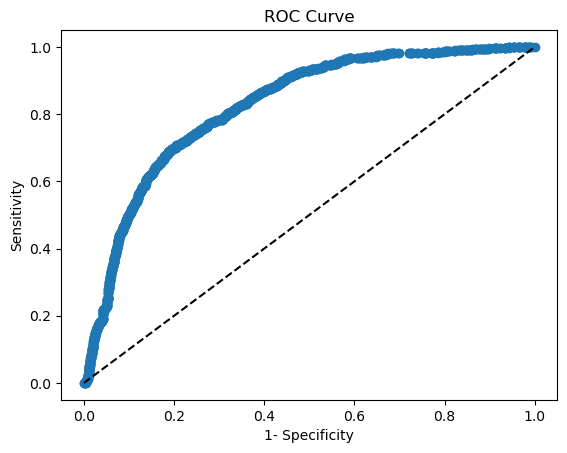

0.8243703190202395


In [375]:
import matplotlib.pyplot as plt
m1spec, sens, thresholds = roc_curve(y_test, p_y_1)
plt.plot([0,1], [0,1], "k--")
plt.scatter(m1spec, sens)
plt.xlabel('1- Specificity')
plt.ylabel('Sensitivity')
plt.title('ROC Curve')
plt.show()
print(roc_auc_score(y_test, p_y_1))